# Udemy Courses Dataset Analysis

This notebook analyzes Udemy's course catalog data including:
- Course subjects and titles
- Pricing information
- Subscription numbers
- Publication dates
- Difficulty levels

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.float_format', '{:,.0f}'.format)

## Data Loading and Initial Inspection

In [80]:
df = pd.read_csv("Udemy_Dataset.csv", parse_dates=['published_timestamp'])
print(f"Dataset loaded successfully with {df.shape[0]} courses and {df.shape[1]} features")

Dataset loaded successfully with 3682 courses and 11 features


## Data Preparation

In [81]:
# 1. Different subjects offered
print("\n=== Subjects Offered ===")
subjects = df['subject'].unique()
print(f"Udemy offers courses in {len(subjects)} subjects:")
print(subjects)


=== Subjects Offered ===
Udemy offers courses in 4 subjects:
['Musical Instruments' 'Business Finance' 'Graphic Design'
 'Web Development']


In [82]:
# 2. Subject with most courses
print("\n=== Subject Popularity ===")
subject_counts = df['subject'].value_counts()
max_subject = subject_counts.idxmax()
print(f"'{max_subject}' has the most courses: {subject_counts.max()}")
display(subject_counts.to_frame('Number of Courses'))


=== Subject Popularity ===
'Web Development' has the most courses: 1200


,Number of Courses
subject,
Web Development,1200
Business Finance,1199
Musical Instruments,680
Graphic Design,603


In [83]:
# 3 & 4. Free vs Paid courses
print("\n=== Pricing Analysis ===")
pricing_dist = df['is_paid'].value_counts(normalize=True)
print(f"Free courses: {pricing_dist[False]:.1%}")
print(f"Paid courses: {pricing_dist[True]:.1%}")


=== Pricing Analysis ===
Free courses: 8.4%
Paid courses: 91.6%


In [84]:
# 5 & 6. Top and least selling courses
print("\n=== Top 5 Selling Courses ===")
display(df.nlargest(5, 'num_subscribers')[['course_title', 'subject', 'num_subscribers']])


=== Top 5 Selling Courses ===


,course_title,subject,num_subscribers
2230,Learn HTML5 Programming From Scratch,Web Development,268923
776,Coding for Entrepreneurs Basic,Web Development,161029
3385,The Web Developer Bootcamp,Web Development,121584
640,Build Your First Website in 1 Week with HTML5 and CSS3,Web Development,120291
3316,The Complete Web Developer Course 2.0,Web Development,114512


In [85]:
print("\n=== 5 Least Selling Courses ===")
display(df.nsmallest(5, 'num_subscribers')[['course_title', 'subject', 'num_subscribers']])


=== 5 Least Selling Courses ===


,course_title,subject,num_subscribers
37,4 Week Rhythm Mastery,Musical Instruments,0
44,60 Minutes to Fundamental Accounting Skills,Business Finance,0
91,ABRSM Grade III Piano Class - Handel Sonatina in G 2017-2018,Musical Instruments,0
98,Accounting - The 6 most important rules you must learn,Business Finance,0
185,Adobe Photoshop pentru Social Media,Graphic Design,0


In [86]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# 7. Graphic Design courses under $100
print("\n=== Affordable Graphic Design Courses (<$100) ===")
graphic_design = df[(df['subject'] == 'Graphic Design') & (df['price'] < 100)]
print(f"Found {len(graphic_design)} courses priced under $100")
display(graphic_design[['course_title', 'price', 'num_subscribers']].sort_values('price'))


=== Affordable Graphic Design Courses (<$100) ===
Found 450 courses priced under $100


,course_title,price,num_subscribers
2304,Learn Real Graphic Design,20,297
2483,Low Poly Portrait Illustration,20,4
1037,Design while you learn InDesign CC,20,1116
2728,Photoshop JumpStart,20,66
2484,Magazine Design: Start your own magazine in less than 24hrs,20,802
...,...,...,...
1027,Design & Create Text Logos in Adobe Photoshop CS5,95,2035
1033,Design bestselling T-shirts from Beginner to Expert.,95,798
3349,The Logo Design Process From Start To Finish,95,2361
2474,LOGO DESIGN IN POWERPOINT,95,1046


In [87]:
# 8. Python-related courses
print("\n=== Python-Related Courses ===")
python_courses = df[df['course_title'].str.contains('Python', case=False)]
print(f"Found {len(python_courses)} Python-related courses")
display(python_courses[['course_title', 'subject', 'num_subscribers']].sort_values('num_subscribers', ascending=False))


=== Python-Related Courses ===
Found 29 Python-related courses


,course_title,subject,num_subscribers
3573,Web Programming with Python,Web Development,35267
777,"Coding for Entrepreneurs: Learn Python, Django, and More.",Web Development,23412
2294,Learn Python and Django: Payment Processing,Web Development,17714
2955,Python and Django Full Stack Web Developer Bootcamp,Web Development,11832
1400,Fun and creative web engineering with Python and Web2py,Web Development,10917
3272,The Complete Ethical Hacking Course 2.0: Python & Kali Linux,Web Development,7827
814,Complete Python Web Course: Build 8 Python Web Apps,Web Development,7489
3460,Try Django 1.9 | Build a Blog and Learn Python's #1 Library,Web Development,7407
2956,Python for Beginners: Python Programming Language | Tutorial,Web Development,6153
3013,REST APIs with Flask and Python,Web Development,5151


In [88]:
# 9. Courses published in 2015
print("\n=== Courses Published in 2015 ===")
courses_2015 = df[df['published_timestamp'] == 2015]
print(f"Found {len(courses_2015)} courses published in 2015")
display(courses_2015[['course_title', 'subject', 'num_subscribers']].sort_values('num_subscribers', ascending=False))


=== Courses Published in 2015 ===
Found 0 courses published in 2015


,course_title,subject,num_subscribers


In [89]:
# 10. Max subscribers by course level
print("\n=== Maximum Subscribers by Course Level ===")
level_stats = df.groupby('level')['num_subscribers'].agg(['max', 'mean', 'count'])
level_stats.columns = ['Max Subscribers', 'Average Subscribers', 'Course Count']
display(level_stats.sort_values('Max Subscribers', ascending=False))


=== Maximum Subscribers by Course Level ===


,Max Subscribers,Average Subscribers,Course Count
level,,,
All Levels,268923,"3,580",1932
Beginner Level,161029,"3,189",1271
Intermediate Level,29167,"1,762",421
Expert Level,5172,865,58


## Advanced Analyses

In [90]:
# Price distribution analysis
print("\n=== Price Distribution ===")
price_stats = df[df['is_paid']].groupby('subject')['price'].agg(['min', 'median', 'max'])
display(price_stats.style.format('${:.2f}'))


=== Price Distribution ===


,min,median,max
subject,,,
Business Finance,$20.00,$50.00,$200.00
Graphic Design,$20.00,$35.00,$200.00
Musical Instruments,$20.00,$45.00,$200.00
Web Development,$20.00,$60.00,$200.00



=== Publication Trends ===


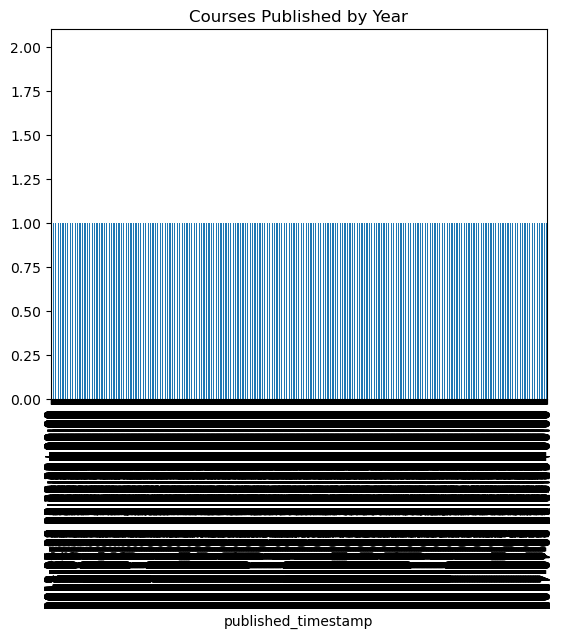

In [91]:
# Publication trends over time
print("\n=== Publication Trends ===")
publication_trends = df.groupby('published_timestamp').size()
publication_trends.plot(kind='bar', title='Courses Published by Year')
plt.show()


=== Subject Popularity Over Time ===


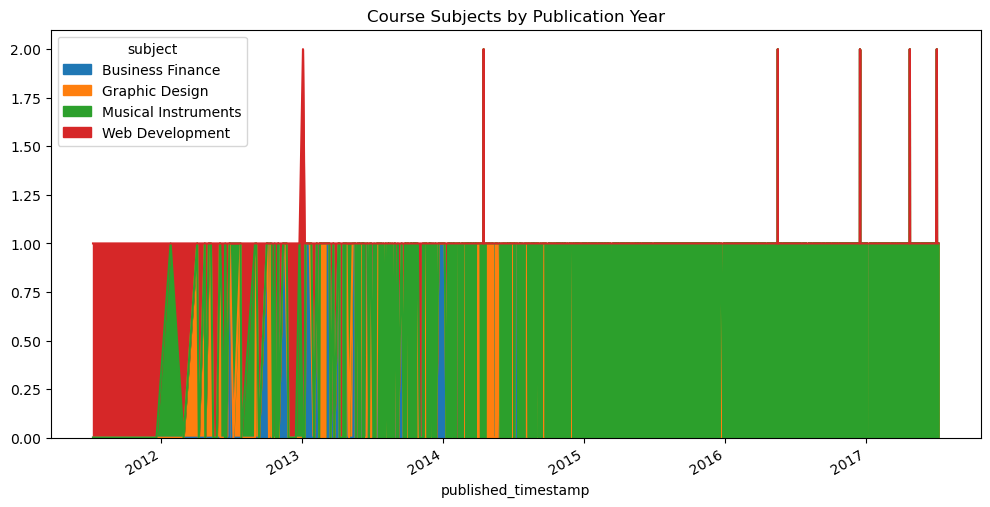

In [92]:
# Subject popularity over time
print("\n=== Subject Popularity Over Time ===")
subject_yearly = df.groupby(['published_timestamp', 'subject']).size().unstack()
subject_yearly.plot(kind='area', stacked=True, figsize=(12, 6))
plt.title('Course Subjects by Publication Year')
plt.show()